# Neural Network for Sentiment Analysis

# Data exploration

Data: Sephora Products and Skincare review, found at: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews?resource=download

Inspiration taken from the sentiment analysis task on Kaggle: \
https://www.kaggle.com/code/aashidutt3/sentiment-analysis-sephora-reviews \
last checked on Jan 23, 2024

In [18]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from utils_data_exploration import get_total_reviews_for_all_dataset, process_csv_file, print_label_percentages, calculate_percentage_and_count_for_values

In [2]:
#checking the amount of files in the dataset
file_paths = []
for filename in glob.glob('./sephora-data/reviews*'):
    print(filename)
    file_paths.append(filename)

./sephora-data/reviews_0-250.csv
./sephora-data/reviews_1250-end.csv
./sephora-data/reviews_750-1250.csv
./sephora-data/reviews_250-500.csv
./sephora-data/reviews_500-750.csv


In [3]:
get_total_reviews_for_all_dataset(file_paths)

/Users/arianabritez/Documents/research-master/resit-neural-network/neural_network/utils_data_exploration.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


File: ./sephora-data/reviews_0-250.csv, Reviews: 602130


/Users/arianabritez/Documents/research-master/resit-neural-network/neural_network/utils_data_exploration.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


File: ./sephora-data/reviews_1250-end.csv, Reviews: 49977


/Users/arianabritez/Documents/research-master/resit-neural-network/neural_network/utils_data_exploration.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


File: ./sephora-data/reviews_750-1250.csv, Reviews: 119317
File: ./sephora-data/reviews_250-500.csv, Reviews: 206725
File: ./sephora-data/reviews_500-750.csv, Reviews: 116262

Total reviews across all files: 1094411


In [4]:
#reading the first file with pandas
df = pd.read_csv(file_paths[0])

/var/folders/c3/6b53cyc56hdcsrh90312r_1w0000gn/T/ipykernel_17049/1527436970.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_paths[0])


In [5]:
df.shape

(602130, 19)

In [6]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [7]:
#keeping the data that is valueable for the task
df = process_csv_file(file_paths[0])
df.head()

/Users/arianabritez/Documents/research-master/resit-neural-network/neural_network/utils_data_exploration.py:32: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,text,label,rating
0,I use this with the Nudestix “Citrus Clean Bal...,1.0,5
1,I bought this lip mask after reading the revie...,0.0,1
2,My review title says it all! I get so excited ...,1.0,5
3,I’ve always loved this formula for a long time...,1.0,5
4,"If you have dry cracked lips, this is a must h...",1.0,5


In [8]:
#checking the count of reviews, labels and rating in the first file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    601131 non-null  object 
 1   label   484644 non-null  float64
 2   rating  602130 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.8+ MB


In [9]:
#checking the amount of labels per class in the first file
df.label.value_counts()

label
1.0    406094
0.0     78550
Name: count, dtype: int64

In [10]:
#printing percentage of both labels in first file. 1 stands for positive and 0 for negative reviews
print_label_percentages(df)

Positive labels percentage: 67.44 %
Negative labels percentage: 13.05 %


In [11]:
#loading the rest of the datasets since the first dataset is unbalanced
df2 = process_csv_file(file_paths[1])
df3 = process_csv_file(file_paths[2])
df4 = process_csv_file(file_paths[3])
df5 = process_csv_file(file_paths[4])

/Users/arianabritez/Documents/research-master/resit-neural-network/neural_network/utils_data_exploration.py:32: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/arianabritez/Documents/research-master/resit-neural-network/neural_network/utils_data_exploration.py:32: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [12]:
#checking the amount of reviews, labels and ratings across all files
df_concat_all = pd.concat([df,df2,df3,df4,df5])
df_concat_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 116261
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   text    1092967 non-null  object 
 1   label   926423 non-null   float64
 2   rating  1094411 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.4+ MB


In [13]:
#percentage of positive and negative label per rating across all files
values = [1,2,3,4,5]
calculate_percentage_and_count_for_values(df_concat_all, 'label', 'rating', values)

For rating value 1: 
 Positive label: 0.77% - count: 406 
 Negative label: 99.23% - count: 52087 

For rating value 2: 
 Positive label: 3.67% - count: 1660 
 Negative label: 96.33% - count: 43602 

For rating value 3: 
 Positive label: 35.66% - count: 25459 
 Negative label: 64.34% - count: 45936 

For rating value 4: 
 Positive label: 96.57% - count: 164351 
 Negative label: 3.43% - count: 5841 

For rating value 5: 
 Positive label: 99.86% - count: 586284 
 Negative label: 0.14% - count: 797 



In [14]:
#percentage of labels across all files
print_label_percentages(df_concat_all)
df_concat_all.label.value_counts()

Positive labels percentage: 71.1 %
Negative labels percentage: 13.55 %


label
1.0    778160
0.0    148263
Name: count, dtype: int64

In [15]:
# Filter to count only rows where 'your_column' is not null
filtered_df = df_concat_all[df_concat_all['label'].notna()]

# Count the occurrences of each value in 'your_column' in the filtered DataFrame
value_counts = filtered_df['label'].value_counts()

# Calculate the percentage for each value
percentage_counts = value_counts / len(filtered_df) * 100

print("Percentage counts in the filtered DataFrame:")
print(percentage_counts)

Percentage counts in the filtered DataFrame:
label
1.0    83.996187
0.0    16.003813
Name: count, dtype: float64


label
1.0    778160
0.0    148263
Name: count, dtype: int64

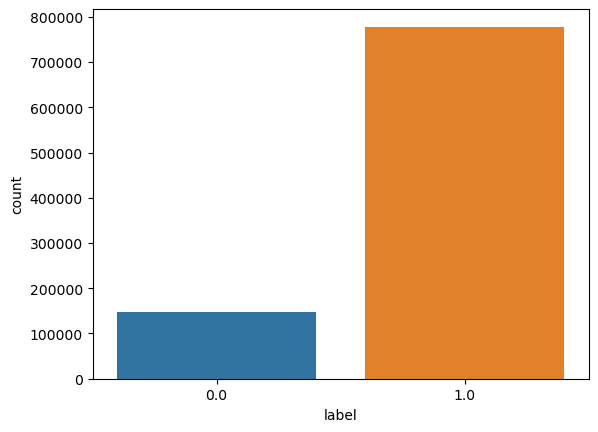

In [16]:
#visualizing the distribution of the data
sns.countplot(x='label', data=filtered_df)
filtered_df.loc[:, 'label'].value_counts()

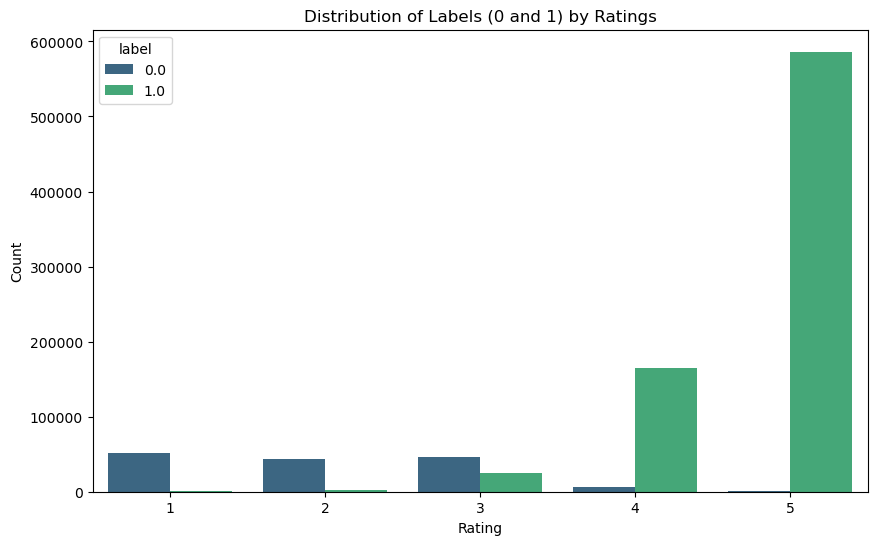

In [17]:
count_df = filtered_df.groupby(['label', 'rating']).size().reset_index(name='count')

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='count', hue='label', data=count_df, palette='viridis')
plt.title('Distribution of Labels (0 and 1) by Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()